In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
df_cancer = pd.read_csv('Breast_cancer_data.csv')
df_cancer.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Breast_cancer_data.csv'

In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df_cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


<AxesSubplot:xlabel='mean_texture', ylabel='mean_perimeter'>

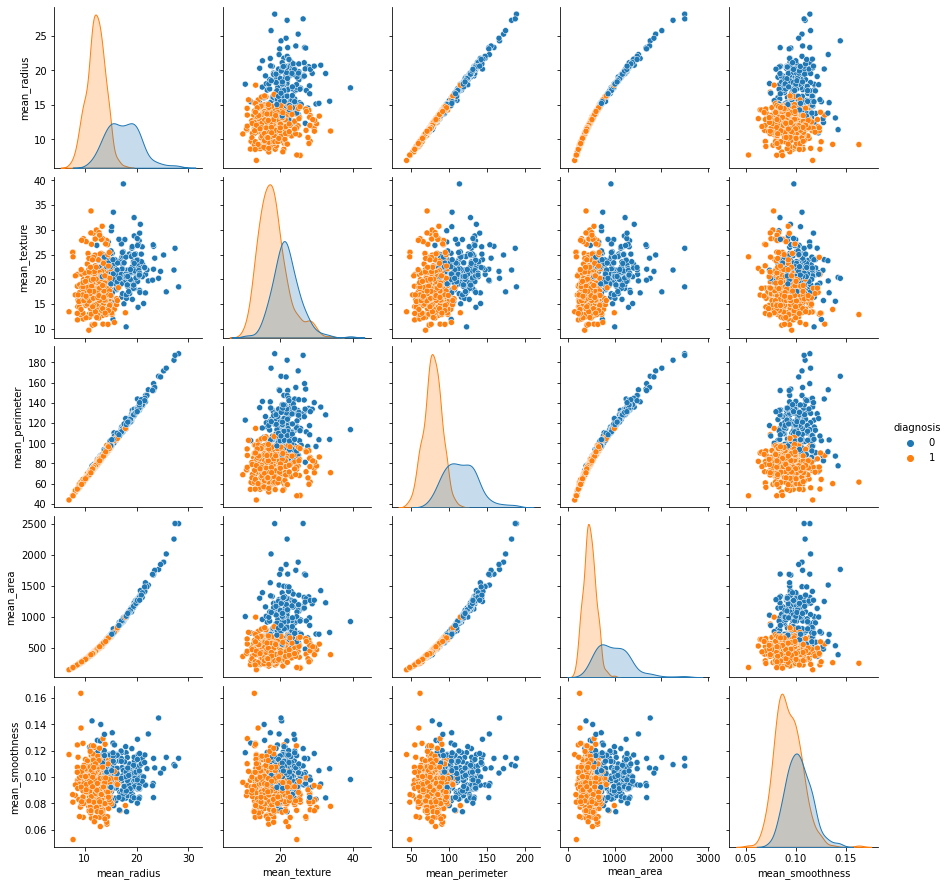

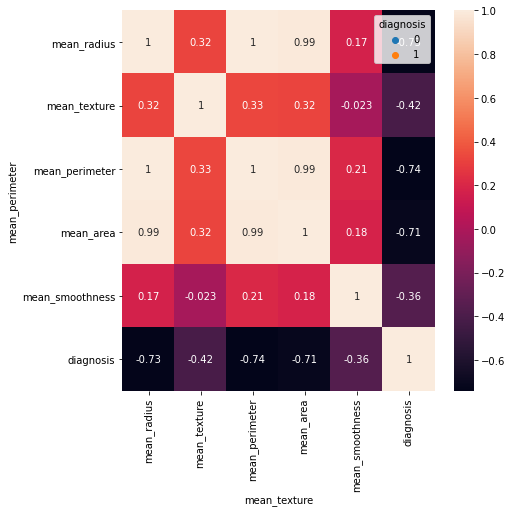

In [5]:
sns.pairplot(df_cancer, hue = 'diagnosis')
plt.figure(figsize=(7,7))
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

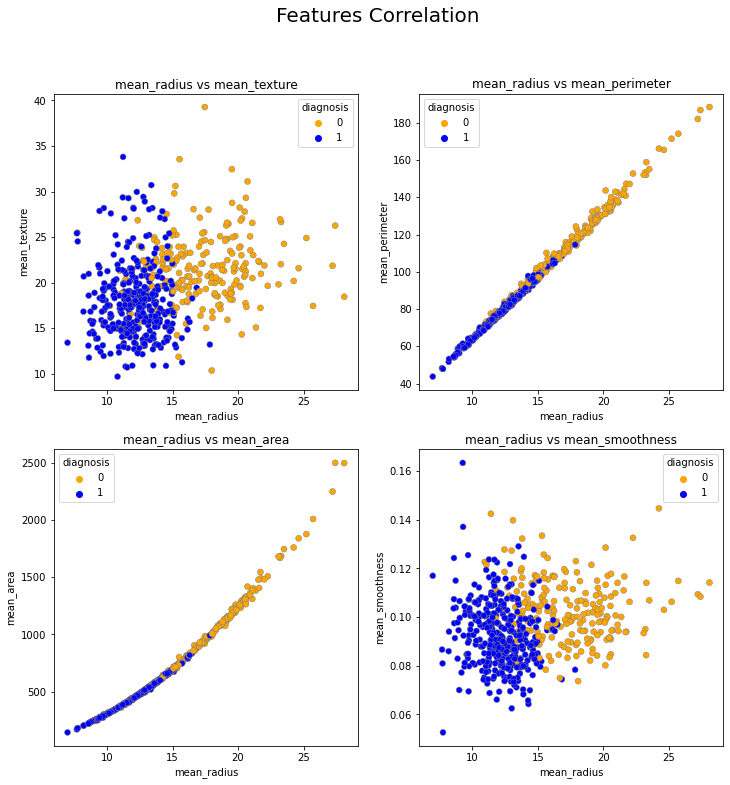

In [6]:
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
ax1 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_texture'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_texture')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_perimeter'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_perimeter')
plt.subplot(223)
ax3 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_area'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')
plt.subplot(224)
ax4 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_smoothness'], hue = "diagnosis",
data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_smoothness')
fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
df_cancer.isnull().sum()
#handling categorical data
df_cancer['diagnosis'].unique()
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Text(0.5, 1.0, 'Corr. between features and target')

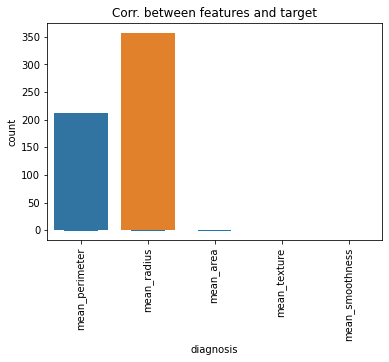

In [9]:
#visualizing diagnosis column >>> 'benign':0,'malignant':1
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('number of Benign_0 vs Malignan_1')
# correlation between features
df_cancer.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

In [10]:
X = df_cancer.drop(['diagnosis'],axis=1).values
y = df_cancer['diagnosis'].values
#split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<AxesSubplot:>

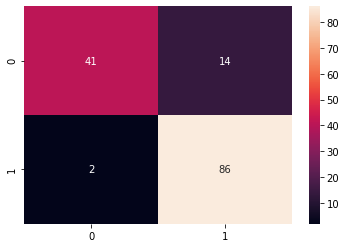

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        55
           1       0.86      0.98      0.91        88

    accuracy                           0.89       143
   macro avg       0.91      0.86      0.88       143
weighted avg       0.90      0.89      0.88       143



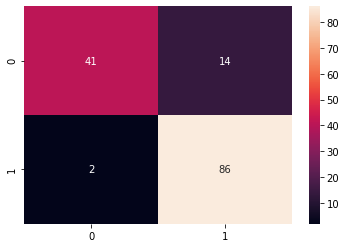

In [16]:
from sklearn.metrics import classification_report, confusion_matrix        #Without normalization
y_predict_scaled = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))